In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

In [10]:
df = pd.read_csv("df_arabica_clean.csv")
df.shape

(207, 41)

In [11]:
# Comptage des mentions de chaque pays
country_counts = df['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country of Origin', 'count']

In [12]:
# Affichage des résultats
print(country_counts)

               Country of Origin  count
0                         Taiwan     61
1                      Guatemala     21
2                       Colombia     19
3                       Honduras     13
4                       Thailand     12
5                       Ethiopia     11
6                         Brazil     10
7                     Costa Rica      8
8                      Nicaragua      7
9                    El Salvador      7
10  Tanzania, United Republic Of      6
11        United States (Hawaii)      5
12                        Mexico      4
13                          Peru      4
14                       Vietnam      4
15                        Uganda      3
16                     Indonesia      3
17                          Laos      3
18                        Panama      2
19                         Kenya      2
20                    Madagascar      1
21                       Myanmar      1


In [13]:
# Additionner les valeurs de la colonne 'count' des 6 premières lignes
total_iteration_count = country_counts['count'].head(7).sum()
print(total_iteration_count)

147


In [14]:
# Calcul du pourcentage pour chaque pays
country_counts['percentage'] = (country_counts['count'] / country_counts['count'].sum()) * 100

In [15]:
# Affichage des résultats
print(country_counts)

               Country of Origin  count  percentage
0                         Taiwan     61   29.468599
1                      Guatemala     21   10.144928
2                       Colombia     19    9.178744
3                       Honduras     13    6.280193
4                       Thailand     12    5.797101
5                       Ethiopia     11    5.314010
6                         Brazil     10    4.830918
7                     Costa Rica      8    3.864734
8                      Nicaragua      7    3.381643
9                    El Salvador      7    3.381643
10  Tanzania, United Republic Of      6    2.898551
11        United States (Hawaii)      5    2.415459
12                        Mexico      4    1.932367
13                          Peru      4    1.932367
14                       Vietnam      4    1.932367
15                        Uganda      3    1.449275
16                     Indonesia      3    1.449275
17                          Laos      3    1.449275
18          

In [16]:
pays_conserves = ["Taiwan", "Guatemala"]

In [17]:
# Remplacer les autres pays par 'other'
df['Country of Origin'] = df['Country of Origin'].apply(lambda x: x if x in pays_conserves else 'Other')

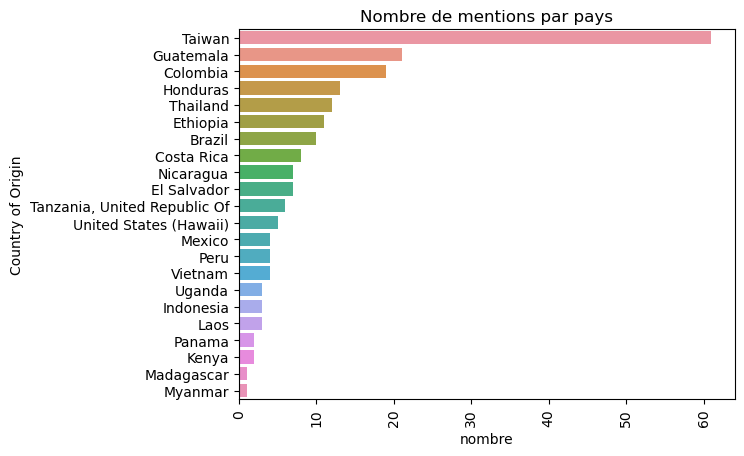

In [19]:
# Création du graphique
sns.barplot(x='count', y='Country of Origin', data=country_counts)
plt.xlabel('nombre')
plt.ylabel('Country of Origin')
plt.title('Nombre de mentions par pays')
plt.xticks(rotation=90)
plt.show()

In [28]:
# Comptage des mentions de chaque pays
country_counts = df['Country of Origin'].value_counts().reset_index()
country_counts.columns = ['Country of Origin', 'count']

In [31]:
# Affichage des résultats
print(country_counts)

  Country of Origin  count
0             Other    125
1            Taiwan     61
2         Guatemala     21


In [33]:
# Affichage les corrélations
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf.iloc[:,range(3,13)].corr()**2


,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall
Aroma,1.000000,0.676964,0.629480,0.508255,0.400816,0.555991,0.000788,NaN,NaN,0.642827
Flavor,0.676964,1.000000,0.768798,0.657614,0.547389,0.725539,0.001581,NaN,NaN,0.770619
Aftertaste,0.629480,0.768798,1.000000,0.663310,0.545640,0.742959,0.000572,NaN,NaN,0.749284
Acidity,0.508255,0.657614,0.663310,1.000000,0.585507,0.648404,0.003914,NaN,NaN,0.706579
Body,0.400816,0.547389,0.545640,0.585507,1.000000,0.666016,0.001928,NaN,NaN,0.595378
Balance,0.555991,0.725539,0.742959,0.648404,0.666016,1.000000,0.007932,NaN,NaN,0.782282
Uniformity,0.000788,0.001581,0.000572,0.003914,0.001928,0.007932,1.000000,NaN,NaN,0.005565
Clean Cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sweetness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall,0.642827,0.770619,0.749284,0.706579,0.595378,0.782282,0.005565,NaN,NaN,1.000000


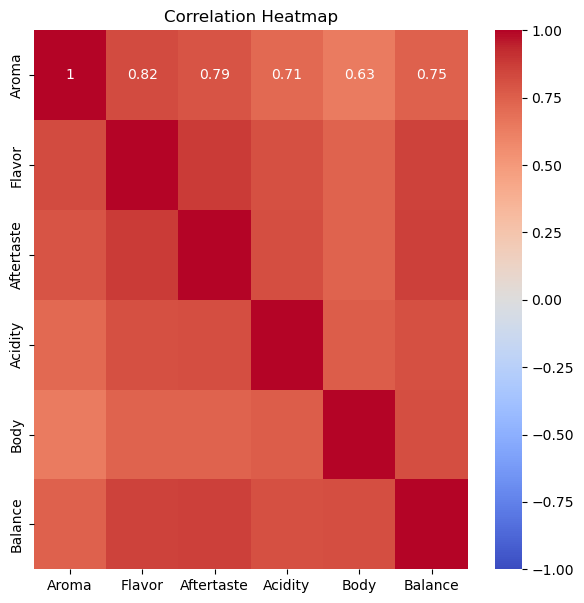

In [35]:
df_matrix = newdf.loc[:,["Aroma","Flavor","Aftertaste","Acidity","Body","Balance"]].corr()

plt.figure(figsize=(7, 7))
sns.heatmap(df_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
# Apercu de la BDD pour la cleaner
df.isnull().any()

Unnamed: 0               False
ID                       False
Country of Origin        False
Farm Name                 True
Lot Number                True
Mill                      True
ICO Number                True
Company                  False
Altitude                  True
Region                    True
Producer                  True
Number of Bags           False
Bag Weight               False
In-Country Partner       False
Harvest Year             False
Grading Date             False
Owner                    False
Variety                   True
Status                   False
Processing Method         True
Aroma                    False
Flavor                   False
Aftertaste               False
Acidity                  False
Body                     False
Balance                  False
Uniformity               False
Clean Cup                False
Sweetness                False
Overall                  False
Defects                  False
Total Cup Points         False
Moisture

In [39]:
# Définir les features + le x & y
features_list = ["Aroma", "Flavor", "Aftertaste", "Acidity","Body","Balance","Category Two Defects","Quakers"] # composantes de x
x = df.loc[:,features_list]
y = df.loc[:,"Country of Origin"]

In [41]:
df_shuffled = df.sample(frac=1).reset_index(drop=True)
print(df_shuffled)

     Unnamed: 0   ID Country of Origin                      Farm Name  \
0            72   72            Taiwan               917農場 (917 Farm)   
1             1    1            Taiwan       Royal Bean Geisha Estate   
2           196  196             Other       EXPORTADORA ATLANTIC S.A   
3           145  145             Other   Doi Tung Development Project   
4           184  184             Other            Fazenda Olhos Dagua   
..          ...  ...               ...                            ...   
202          58   58            Taiwan                         嵐雲綠海咖啡   
203          37   37            Taiwan   御香咖啡園 YU SIANG Coffee Estate   
204          99   99         Guatemala        SAN RAFAEL URIAS VALDES   
205          32   32            Taiwan  金讚咖啡農莊園(Jinzan Coffee Estate)   
206          76   76             Other  Bisrat Melaku Washing Station   

                                  Lot Number                           Mill  \
0                                    2021/11

In [43]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                            
                                                    stratify=y)

In [45]:
x_train

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Category Two Defects,Quakers
95,7.58,7.83,7.58,7.75,7.67,7.75,2,1
187,7.33,7.42,7.25,7.42,7.42,7.33,4,2
117,7.67,7.67,7.50,7.67,7.58,7.67,0,2
175,7.17,7.50,7.42,7.42,7.58,7.50,0,0
70,7.83,7.92,7.75,7.75,7.75,7.75,3,0
...,...,...,...,...,...,...,...,...
37,8.25,8.08,7.83,7.75,7.67,7.75,0,0
114,7.75,7.75,7.50,7.58,7.83,7.50,2,0
135,7.67,7.67,7.50,7.58,7.58,7.50,0,0
24,7.83,8.00,7.92,8.00,8.00,7.92,0,0


In [47]:
y_train

95     Guatemala
187        Other
117        Other
175        Other
70         Other
         ...    
37        Taiwan
114        Other
135       Taiwan
24        Taiwan
169        Other
Name: Country of Origin, Length: 165, dtype: object

In [49]:
print("Shape of x_train", x_train.shape)

Shape of x_train (165, 8)


In [51]:
# Standardiser la donnée d'entrainement
standard_scaler = StandardScaler()
# Calcul automatique de la moyenne et de l'écart type sur les valeurs
standard_scaler.fit(x_train)
# Transformation des données d'entraînement depuis ce dernier calcul
x_train=standard_scaler.transform (x_train)
print(x_train)

[[-0.45595731  0.3171796  -0.04434499 ...  0.43292822 -0.09347049
   0.19863234]
 [-1.3128247  -1.10854798 -1.18329994 ... -1.17231124  0.59197979
   0.79452936]
 [-0.14748505 -0.23920189 -0.32045528 ...  0.12716832 -0.77892078
   0.79452936]
 ...
 [-0.14748505 -0.23920189 -0.32045528 ... -0.52257146 -0.77892078
  -0.39726468]
 [ 0.40091007  0.90833494  1.12912376 ...  1.082668   -0.77892078
  -0.39726468]
 [ 0.12671251 -1.10854798 -0.90718965 ... -0.52257146  0.93470493
  -0.39726468]]


In [53]:
x_test=standard_scaler.transform (x_test)

In [55]:
# Encodage des labels d'entrainement
labelencoder = LabelEncoder()
# Transformation des labels
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.fit_transform(y_test)
print(y_train[:5]) # Afficher les 5 premières lignes
print ()

[0 1 1 1 1]



In [57]:
# vérifier les labels attribués aux valeurs de la colonne
# numéros de class
labelencoder.classes_

array(['Guatemala', 'Other', 'Taiwan'], dtype=object)

In [59]:
# instancier la regression logistique
log_regression = LogisticRegression()
# entraine la regression logistique sur x_train et y_train
log_regression.fit(x_train, y_train)

LogisticRegression()

In [61]:
# Créer des prédictions à partir des entraînements
y_test_pred = log_regression.predict(x_test)
# Calcul du score
log_regression.score(x_train, y_train)

0.7515151515151515

In [63]:
# Calcul du score
log_regression.score(x_test, y_test)

0.7619047619047619